In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1: Given some sample data, write a program to answer the following

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?


In [2]:
df = pd.read_csv('2019 Winter Data Science.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [6]:
# Adding day columns
d = pd.to_datetime(df['created_at'])
df['day'] = d.map(lambda x : x.date().day)

In [7]:
# Adding price columns as price per item
df['price'] = df['order_amount']/df['total_items']
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,day,price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,13,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,3,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,14,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,26,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,1,156.0


In [ ]:
Since dataset is for 30 days, And there are 5000 order, we can calculate per order average  order amount

In [11]:
Total_amount = df['order_amount'].sum() 
Total_amount

15725640

In [12]:
Average_order_value = Total_amount / 5000
Average_order_value

3145.128

In [ ]:
So AOV(average order value) is 3145.13. But when we look at datasets, all 5000 order are not equal in size of quantity.
Most of order have total_items with in range of 1 - 8 items.
But there is one user id(user_id=607), who is ordering 2000 items for 17 order. Which is unusuall from other dataset.

In [13]:
df[df['total_items']>8]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,day,price
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,7,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,4,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,2,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,24,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,15,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,11,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,19,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,17,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,12,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,7,352.0


In [18]:
outlier_amount = df[df['user_id'] == 607]['order_amount'].sum()
outlier_amount

11968000

In [ ]:
If we sum up all the order of user_id :607. We will get 11.9 Million  which is almoust 12 million in amount, and we have over
Total amount around 15.7 million. So most of the amount is from user id :607

In [ ]:
If we isolate this particular user id, then we will get all the similar amount of order.

In [19]:
similar_amount = Total_amount - outlier_amount
similar_amount

3757640

In [20]:
outlier_count = df[df['user_id'] == 607]['order_amount'].count()
outlier_count

17

In [21]:
similar_amount_count = 5000 - outlier_count
similar_amount_count

4983

In [ ]:
So now after isolating one user id, we have similar amount which is around 3.7 million and also similar amount count which is 4983.
Now we can calculate average order value with this data and we will get accurate value.

In [22]:
Average = similar_amount / similar_amount_count
Average

754.0919125025085

### Accurate average value

In [ ]:
Hence 754.09 is accurate average value.

In [28]:
new_df = df.drop(df[df['user_id'] == 607].index,axis = 0)

In [29]:
new_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,day,price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,13,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,3,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,14,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,26,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,1,156.0
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,30,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,19,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,16,177.0


In [63]:
# mean value for payment method
new_df.groupby('payment_method')['order_amount'].mean()

payment_method
cash           730.353199
credit_card    569.189173
debit          966.840215
Name: order_amount, dtype: float64

C:\Users\sm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment_method', ylabel='order_amount'>

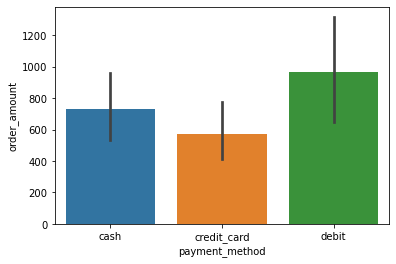

In [45]:
sns.barplot(new_df['payment_method'],new_df['order_amount'])

### mean value for each day

<BarContainer object of 30 artists>

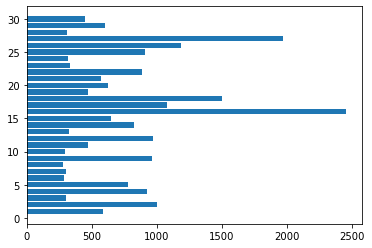

In [64]:
x = new_df.groupby('day')['order_amount'].mean().index
y = new_df.groupby('day')['order_amount'].mean().values
plt.barh(x,y)

C:\Users\sm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day'>

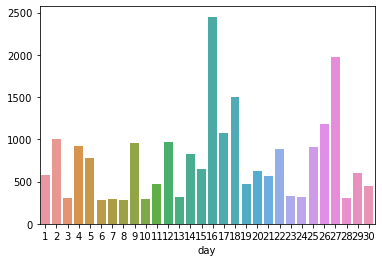

In [65]:
sns.barplot(x,y)

## Question 2: For this question you’ll need to use SQL.

Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

1. How many orders were shipped by Speedy Express in total?
2. What is the last name of the employee with the most orders?
3. What product was ordered the most by customers in Germany?



### 1. How many orders were shipped by Speedy Express in total?

In [67]:
# SQL Statement:
SELECT count(*) FROM [Orders] where ShipperID = 1


### Result:
54

### 2. What is the last name of the employee with the most orders?

In [ ]:
# SQL Statement:
SELECT Employees.LastName, MAX(TAB1.Orders_count) FROM 
((SELECT count(*) AS Orders_count,EmployeeID  FROM [Orders] GROUP BY EmployeeID) AS TAB1 
INNER JOIN Employees ON TAB1.EmployeeID = Employees.EmployeeID)


### Result:

In [ ]:
# LastName :                     MAX(TAB1.Orders_count) :     
  Peacock                                    40

### 3. What product was ordered the most by customers in Germany?

In [ ]:
# SQL Statement:
SELECT Products.ProductName, Max(OrderDetails.Quantity)  FROM (((Products
INNER JOIN OrderDetails ON OrderDetails.ProductID = Products.ProductID)
INNER JOIN Orders ON Orders.OrderID = OrderDetails.OrderID)
INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID)
Where Customers.Country = 'Germany'


### Result:

In [ ]:
# ProductName :                              Max(OrderDetails.Quantity):
  Steeleye Stout                                100
